### Imports

In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from scipy.cluster.hierarchy import dendrogram, linkage

### Leitura dos dados

In [37]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [38]:
X[:10]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207],
       [ 3.43761754,  0.26165417],
       [-1.80822253,  1.59701749],
       [ 1.41372442,  4.38117707],
       [-0.20493217,  8.43209665],
       [-0.71109961,  8.66043846]])

In [39]:
y[:10]

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3])

### Analise do quantil

In [71]:
df_use = pd.DataFrame(X)
lista_colunas = df_use.columns.tolist()

lista_quantiles = []

for column in lista_colunas:
    quantile_1 = df_use[column].quantile(0.1)
    quantile_2 = df_use[column].quantile(0.2)
    quantile_3 = df_use[column].quantile(0.3)
    quantile_4 = df_use[column].quantile(0.4)
    quantile_5 = df_use[column].quantile(0.5)
    quantile_6 = df_use[column].quantile(0.6)
    quantile_7 = df_use[column].quantile(0.7)
    quantile_8 = df_use[column].quantile(0.8)
    quantile_9 = df_use[column].quantile(0.9)
    
    lista_quantiles.append([quantile_1, quantile_2, quantile_3, quantile_4, quantile_5,
                           quantile_6, quantile_7, quantile_8, quantile_9])
    
df_quantiles = pd.DataFrame(lista_quantiles).transpose()
df_quantiles.columns = lista_colunas
df_quantiles

,0,1
0,-1.950327,0.750531
1,-1.641714,1.306058
2,-1.317253,2.316719
3,-1.003053,3.008390
4,-0.044497,3.529012
5,0.730605,4.237171
6,1.246225,4.903777
7,1.669838,7.302984
8,2.141313,7.898023


### Correlação

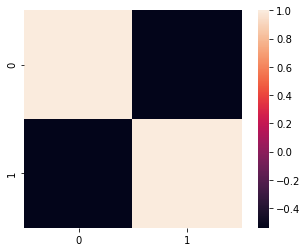

In [40]:
cor = pd.DataFrame(X).corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

### Normalizacao dos dados

In [5]:
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

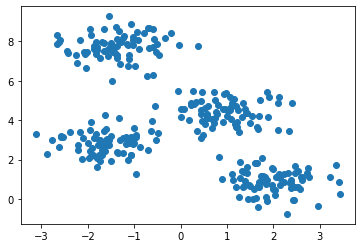

In [6]:
plt.scatter(X[:,0], X[:,1])

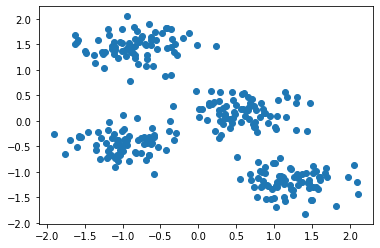

In [7]:
plt.scatter(X_normalizado[:,0], X_normalizado[:,1])

### Kmeans

In [8]:
list_wcss = []
list_silhouettes = []
list_test_clusters = list(range(2, 11))

for i in list_test_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_normalizado)
    list_wcss.append(kmeans.inertia_)
    
    # silhouette score
    score = silhouette_score(X_normalizado, kmeans.labels_)
    list_silhouettes.append(score)

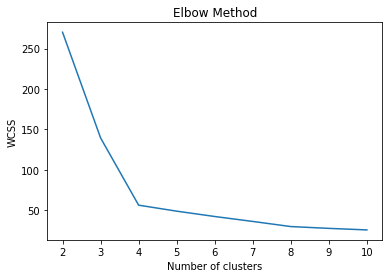

In [9]:
plt.plot(list_test_clusters, list_wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

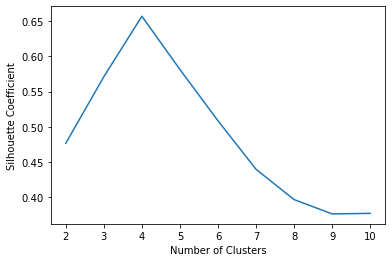

In [10]:
plt.plot(list_test_clusters, list_silhouettes)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Aplica kmeans otimo

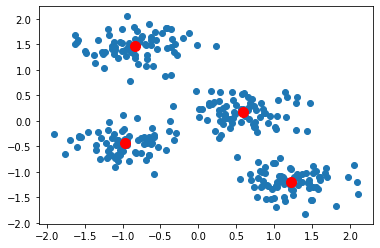

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_normalizado)
plt.scatter(X_normalizado[:,0], X_normalizado[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

In [54]:
kmeans.cluster_centers_

array([[ 1.21774671, -1.19712077],
       [-0.83691948,  1.46193015],
       [-0.96619422, -0.43906093],
       [ 0.58536699,  0.17425154]])

In [55]:
kmeans.labels_

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2])

In [56]:
df = pd.DataFrame(X)
df['cluster'] = kmeans.labels_

In [57]:
df

,0,1,cluster
0,0.836857,2.136359,0
1,-1.413658,7.409623,1
2,1.155213,5.099619,3
3,-1.018616,7.814915,1
4,1.271351,1.892542,0
...,...,...,...
295,1.973698,1.579798,0
296,2.518342,1.391766,0
297,0.438990,4.535929,3
298,0.369479,7.791105,1


In [58]:
df.groupby('cluster').mean()

,0,1
cluster,,
0,1.982583,0.867713
1,-1.373244,7.753689
2,-1.584385,2.830813
3,0.949735,4.419069


### Clusterizacao Hierarquica

In [22]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_normalizado)

array([3, 0, 1, 0, 3, 3, 2, 1, 0, 0, 2, 0, 1, 0, 3, 1, 1, 3, 2, 2, 3, 3,
       1, 2, 2, 2, 3, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 1, 2, 1, 1,
       2, 2, 0, 2, 0, 3, 2, 3, 0, 3, 3, 2, 0, 2, 0, 3, 0, 1, 0, 2, 2, 2,
       0, 3, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 3, 1,
       0, 0, 1, 3, 0, 2, 2, 1, 3, 3, 1, 2, 0, 3, 0, 3, 1, 3, 3, 1, 0, 1,
       2, 2, 3, 0, 3, 1, 0, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 0, 2,
       2, 3, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1,
       3, 2, 0, 2, 3, 1, 0, 1, 1, 3, 1, 2, 2, 1, 3, 1, 1, 0, 3, 1, 2, 0,
       3, 3, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 3, 0, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 3, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 3, 3, 1,
       0, 3, 3, 2, 3, 2, 1, 0, 0, 1, 1, 0, 1, 3, 2, 1, 3, 2, 0, 2, 3, 1,
       3, 0, 0, 0, 0, 2, 2, 0, 1, 2, 3, 1, 2, 2, 2, 3, 3, 0, 1, 1, 2, 3,
       0, 2, 1, 0, 1, 3, 3, 2, 2, 1, 3, 3, 3, 1, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 2, 0, 1, 3, 3, 0, 0, 0, 3, 3, 1, 0, 2], d

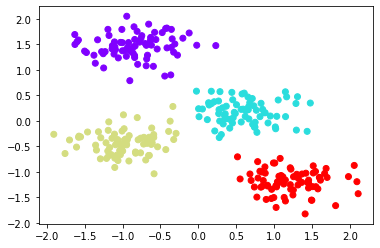

In [26]:
plt.scatter(X_normalizado[:,0], X_normalizado[:,1], c=cluster.labels_, cmap='rainbow')

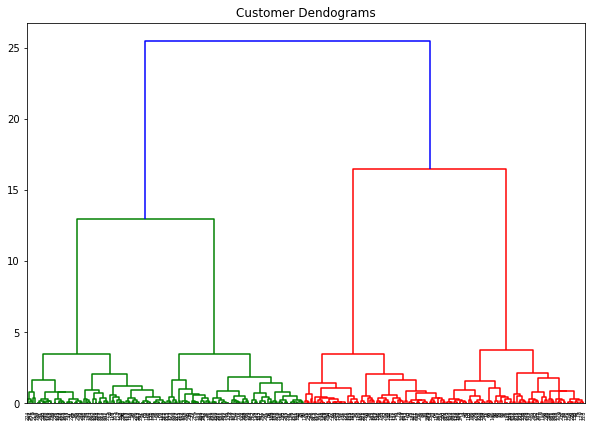

In [27]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = dendrogram(linkage(X_normalizado, method='ward'))

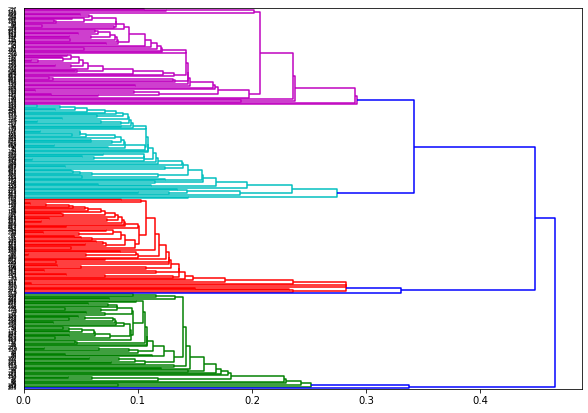

In [32]:
linked = linkage(X_normalizado, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='right',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

### Affinity Propagation

In [47]:
wh1 = pd.DataFrame(X_normalizado)

def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(wh1)
affinity = pd.DataFrame(clust_labels2)
wh1.insert((wh1.shape[1]),'affinity',affinity)

C:\Users\yanvs\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


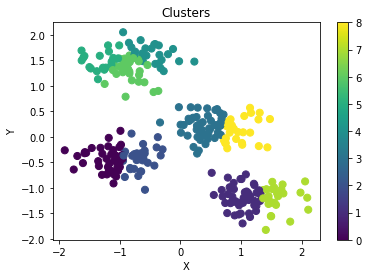

In [53]:
# Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1[0], wh1[1], c=affinity[0], s=50)
ax.set_title('Clusters')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(scatter)